## SQLi Dataset Exploration

### Objectives
- Learn about SQL injections.
- Explore SQLi techniques

### Theory

The **SQL injection** is a code injection technique used to attack data-driven applications, in which malicious SQL statements are inserted in a way that it is executed.

There are diffrent **types of SQL injection attacks**:
- **Union-based SQLi:** 2 or more SQLi queries combined.
- **Error-based SQLi:** invalid query input that causes failure
- **Blind-based SQLi:** attacker choses moves based ib questions asked for the database (a type of DDos attacks) and it's the worse between the 3 of them.

![image](https://github.com/sondosaabed/Intro-to-GAN/assets/65151701/30662fc6-fa83-45d0-88bc-4fe4e2f0b396)

sources: https://www.researchgate.net/publication/364935556_A_comprehensive_review_of_methods_for_SQL_injection_attack_detection_and_prevention

attackers come up with new techniques all the time. 

### Dataset Exploration

In [1]:
import numpy as np 
import pandas as pd 
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

- Loading the dataset into a dataframe

In [2]:
df = pd.read_csv("/kaggle/input/sql-injection-dataset/SQLiV3.csv")

- Exploring the dataset

In [3]:
def missing_values(df):
    """
    This is to get the percetages of missing data
    Args:
        df (pd.Dataframe): contains the data
    Returns:
        missing_percetanges(pd.Dataframe): contains Column,	Counts, and	Percentage
            of the missing values for eah colmn
    """
    missing_count = df.isnull().sum()
    missing_percetanges = pd.DataFrame({
        'Column': missing_count.index,
        'Counts': missing_count.values,
        'Percentage': missing_count.values / len(df) * 100  
    })
    return  missing_percetanges

In [4]:
def explore_sample(sample):
    """
    Exploring a dataset sample
    Args:
        sample (pd.Dataframe): the dataset sample to explore.
    Returns:
        results (dict): containing results of each exploration with the title as key
    """
    head = pd.DataFrame(sample.head())
    tail = pd.DataFrame(sample.tail())
    nunique = pd.DataFrame(sample.nunique(), columns=["#_of_Unique"])
    describe = pd.DataFrame(sample.describe())
    dtypes =  pd.DataFrame(sample.dtypes, columns=["Datatype"])
    results = {
        'Table 3: Dataset Head:':head,
        'Table 4: Dataset Tail:':tail,
        'Table 5: Dataset Numerical Describtion: ':describe,
        'Table 6: Missing Values By Percentage': missing_values(sample), 
        'Table 7: Dataset Columns Data types: ':dtypes,
        'Table 8: Number of uniques in the datasets:':nunique}
    return results

In [5]:
def print_dataset_exploration(results):
    """
    Prints a beautufil display of each of the exploration dataframe
    Args:
        results (dict): contains exploration outputs with the title as key
    Returns:
        nothing
    """
    for operation, dataframe in results.items():
        print(f"{operation}")
        if operation == 'Table 6: Missing Values By Percentage':
            print("Total Sum of Missing Percetange: ", dataframe['Percentage'].sum())
        display(dataframe)

In [6]:
results = explore_sample(df)
print_dataset_exploration(results)

Table 3: Dataset Head:


,Sentence,Label,Unnamed: 2,Unnamed: 3
0,""" or pg_sleep ( __TIME__ ) --",1,NaN,NaN
1,create user name identified by pass123 tempora...,NaN,1,NaN
2,AND 1 = utl_inaddr.get_host_address ( ...,1,NaN,NaN
3,select * from users where id = '1' or @ @1 ...,1,NaN,NaN
4,"select * from users where id = 1 or 1#"" ( ...",1,NaN,NaN


Table 4: Dataset Tail:


,Sentence,Label,Unnamed: 2,Unnamed: 3
30914,DELETE FROM door WHERE grow = 'small',0,NaN,NaN
30915,DELETE FROM tomorrow,0,NaN,NaN
30916,SELECT wide ( s ) FROM west,0,NaN,NaN
30917,SELECT * FROM ( SELECT slide FROM breath ),0,NaN,NaN
30918,SELECT TOP 3 * FROM race,0,NaN,NaN


Table 5: Dataset Numerical Describtion: 


,Unnamed: 3
count,9.000000
mean,0.222222
std,0.440959
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Table 6: Missing Values By Percentage
Total Sum of Missing Percetange:  199.85445842362302


,Column,Counts,Percentage
0,Sentence,15,0.048514
1,Label,255,0.824736
2,Unnamed: 2,30613,99.010317
3,Unnamed: 3,30910,99.970892


Table 7: Dataset Columns Data types: 


,Datatype
Sentence,object
Label,object
Unnamed: 2,object
Unnamed: 3,float64


Table 8: Number of uniques in the datasets:


,#_of_Unique
Sentence,30872
Label,42
Unnamed: 2,6
Unnamed: 3,2


- Sentences SQLi visualizaion

(-0.5, 399.5, 199.5, -0.5)

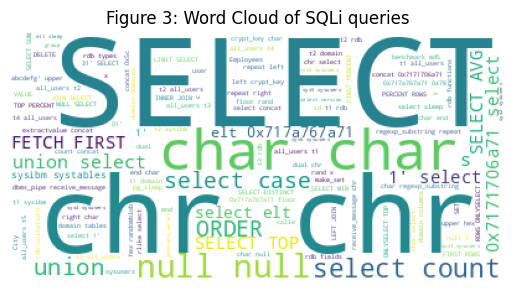

In [7]:
words = ' '.join(df['Sentence'].dropna())
wordcloud = WordCloud(background_color='white').generate(words)
plt.imshow(wordcloud)
plt.title('Figure 3: Word Cloud of SQLi queries')
plt.axis('off')